Obligatory assignment 5

Task 1

Graph with 41 nodes and 75 edges
['A', 'carrots', 'eggs', '"fatty fish"', '"green leafy vegs"', 'liver', 'milk', 'tomatoes', 'B12', 'B6', 'asparagus', 'beans', 'kidneys', 'potatoes', 'C', 'pumpkins', 'Ca', 'broccoli', 'cheese', 'Cu', 'nuts', '"whole grains"', 'D', 'mushrooms', 'E', 'seeds', 'Mn', 'legumes', 'wheat', 'Se', 'Zn', 'beef', 'riboflavin', 'niacin', 'folates', 'spinach', 'poultry', 'shellfish', 'thiamin', '"veg oils"', 'yogurt']
[('A', 'carrots'), ('A', 'eggs'), ('A', '"fatty fish"'), ('A', '"green leafy vegs"'), ('A', 'liver'), ('A', 'milk'), ('A', 'tomatoes'), ('carrots', 'C'), ('eggs', 'B12'), ('eggs', 'riboflavin'), ('"fatty fish"', 'B6'), ('"fatty fish"', 'D'), ('"fatty fish"', 'B12'), ('"fatty fish"', 'niacin'), ('"green leafy vegs"', 'Mn'), ('"green leafy vegs"', 'C'), ('"green leafy vegs"', 'Ca'), ('"green leafy vegs"', 'E'), ('"green leafy vegs"', 'riboflavin'), ('liver', 'B6'), ('liver', 'Cu'), ('liver', 'folates'), ('liver', 'Se'), ('liver', 'Zn'), ('milk', 'B12'),

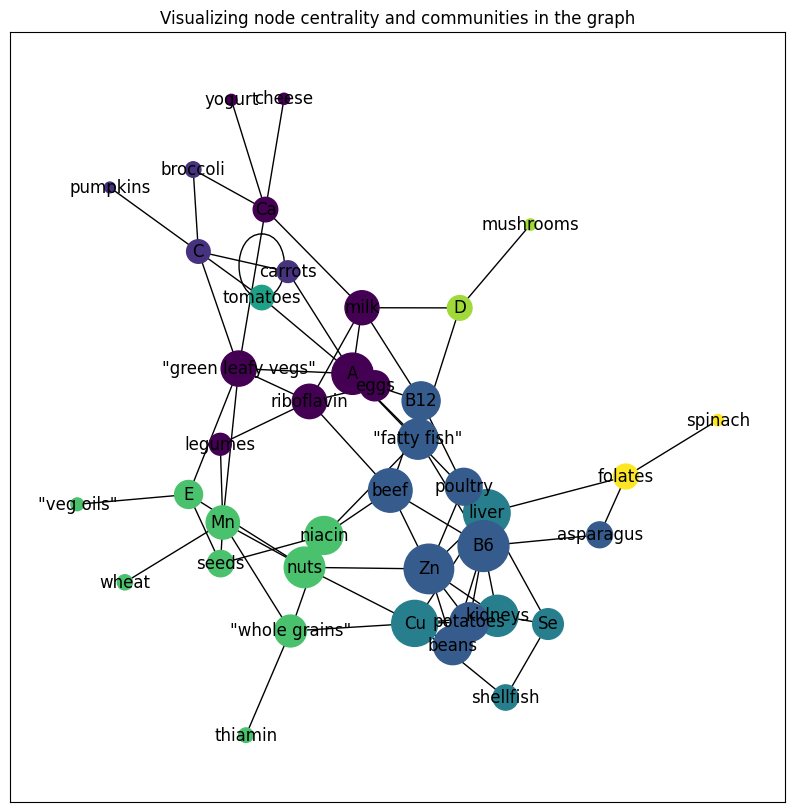

In [1]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt

# 1.1: Loads an undirected graph, which separates values by "," (because it is a CSV file)
G = nx.read_edgelist("nutrients.csv", delimiter=",")

print(G)
print(G.nodes)
print(G.edges)
print(len(G.nodes))
print(G["A"])

# 1.2: Compute the eigenvector centrality for the graph G (Returns -> dictionary, and has eigenvector centrality as the value)
centrality = nx.eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight=None)

print(centrality)

# 1.3: Detect modularity of the graph using label propagation
# Communities are detected using label propagation, and then converted to list (because it returns generator)
# It returns a list where each community is a set
community = list(nx_comm.label_propagation_communities(G))
modularity = nx_comm.modularity(G, community)

print(f"Community: {community}")
print(f"Modularity: {modularity}")

# 1.4: Modify the size and color based on the above measures
# Each node is mapped to its community
community_dict = {}
value = 0
for element in community:
    for node in element:
        community_dict[node] = value
    value += 1

# Node sizes and colors (based on centrality and color in dictionary)
size = []
colors = []

for node in G.nodes():
    size.append(4000 * centrality[node])
    colors.append(community_dict[node])

print(size)
print(colors)

# 1.5: Use spring layout for visualizing the graph
# Spring layout
pos = nx.spring_layout(G)

# Plot (applies size and colors)
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_size=size, node_color=colors)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.title("Visualizing node centrality and communities in the graph")
plt.show()